In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np

#### 1 数据加载

In [2]:
df_train = pd.read_csv("./cs-training.csv")
df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


#### 2 去除不用的特征列

In [3]:
# 去除第一列
df_train = df_train.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


#### 3 预测字段的分布

In [4]:
df_train["SeriousDlqin2yrs"].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

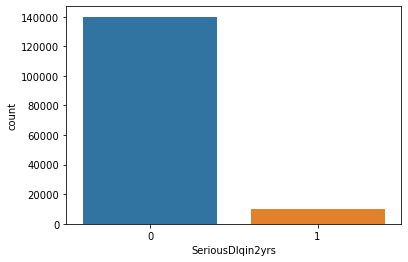

In [5]:
# 违约率SeriousDlqin2yrs进行可视化
sns.countplot(x="SeriousDlqin2yrs", data=df_train)

In [6]:
df_train["SeriousDlqin2yrs"].sum() / len(df_train) # 违约比例

0.06684

#### 4 查看缺失值

In [7]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

#### 5 查看RevolvingUtilizationOfUnsecuredLines特征

In [8]:
df_train["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

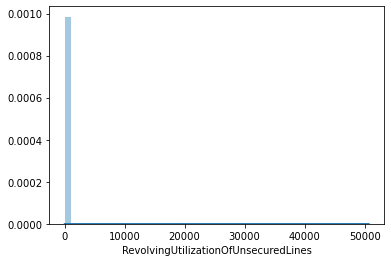

In [9]:
# 直方图分布
sns.distplot(df_train["RevolvingUtilizationOfUnsecuredLines"])

#### 6 缺失值填充

In [10]:
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [11]:
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [12]:
# 使用中位数进行缺失值填充
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

#### 7数据分箱

+ 1) 对于age字段，分成6段[-math.inf, 25, 40, 50, 60, 70, math.inf]
+ 2) 对于NumberOfDependents（家属人数）字段，分成6段[-math.inf,2,4,6,8,10,math.inf]
+ 3) 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
+ 4) 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段

In [13]:
# 将age字段进行分箱
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train["bin_age"] = pd.cut(df_train["age"], bins=age_bins)
df_train[["age", "bin_age"]]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [14]:
# 将对于NumberOfDependents字段进行分箱

In [15]:
dependents_bins = [-math.inf,2,4,6,8,10,math.inf]
df_train["bin_NumberOfDependents"] = pd.cut(df_train["NumberOfDependents"], bins=dependents_bins)
df_train[["NumberOfDependents", "bin_NumberOfDependents"]]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [16]:
# 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train["bin_NumberOfTime30-59DaysPastDueNotWorse"] = pd.cut(df_train["NumberOfTime30-59DaysPastDueNotWorse"], bins=dpd_bins)
df_train["bin_NumberOfTime60-89DaysPastDueNotWorse"] = pd.cut(df_train["NumberOfTime60-89DaysPastDueNotWorse"], bins=dpd_bins)
df_train["bin_NumberOfTimes90DaysLate"] = pd.cut(df_train["NumberOfTimes90DaysLate"], bins=dpd_bins)

In [17]:
df_train[["bin_NumberOfTime30-59DaysPastDueNotWorse", "bin_NumberOfTime30-59DaysPastDueNotWorse", "bin_NumberOfTimes90DaysLate"]]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(1.0, 2.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [18]:
# 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
df_train["bin_RevolvingUtilizationOfUnsecuredLines"] = pd.qcut(df_train["RevolvingUtilizationOfUnsecuredLines"], q=5, duplicates="drop")
df_train["bin_DebtRatio"] = pd.qcut(df_train["DebtRatio"], q=5, duplicates="drop")
df_train["bin_MonthlyIncome"] = pd.qcut(df_train["MonthlyIncome"], q=5, duplicates="drop")
df_train["bin_NumberOfOpenCreditLinesAndLoans"] = pd.qcut(df_train["NumberOfOpenCreditLinesAndLoans"], q=5, duplicates="drop")
df_train["bin_NumberRealEstateLoansOrLines"] = pd.qcut(df_train["NumberRealEstateLoansOrLines"], q=5, duplicates="drop")

In [19]:
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-0.001, 1.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(-0.001, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-0.001, 1.0]"


In [20]:
df_train["bin_NumberRealEstateLoansOrLines"].value_counts()

(-0.001, 1.0]    108526
(1.0, 2.0]        31522
(2.0, 54.0]        9952
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

#### 8 统计分箱字段

In [21]:
bin_cols = [c for c in df_train.columns.values if c.startswith("bin_")]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

#### 9 计算IV值

In [22]:
# 计算IV，衡量变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ["Variable", "Value", "All", "Bad"]
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature]==val].count()[feature], \
                    df[(df[feature]==val) & (df[target] == 1)].count()[feature]])
    data = pd.DataFrame(lst, columns=cols)
    data = data[data["Bad"] > 0]
    data["Share"] = data["All"] / data["All"].sum()
    data["Bad Rate"] = data["Bad"] / data["All"]
    data["Margin Bad"] = data["Bad"] / data["Bad"].sum()
    data["Margin Good"] = (data["All"] - data["Bad"]) / (data["All"].sum() - data["Bad"].sum())
    data["woe"] = np.log(data["Margin Bad"]/ data["Margin Good"])
    data["iv"] = (data["woe"] * (data["Margin Bad"] - data["Margin Good"])).sum()
#     data["iv"] = data["woe"] * (data["Margin Bad"] - data["Margin Good"])
#     print(data)
    data.sort_values(by=["Variable", "Value"])
    return data["iv"].values[0]

In [23]:
cal_IV(df_train, "bin_age", "SeriousDlqin2yrs")

0.24041120302785982

In [24]:
for f in bin_cols:
    print(f, cal_IV(df_train, f, "SeriousDlqin2yrs"))

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.0120914141106244


In [25]:
# 只选择IV>0.1的，入选的字段有5个
# bin_NumberOfTime30-59DaysPastDueNotWorse
# bin_NumberOfTime60-89DaysPastDueNotWorse
# bin_NumberOfTimes90DaysLate
# bin_RevolvingUtilizationOfUnsecuredLines
# bin_age

In [26]:
feature_cols = ["bin_NumberOfTime30-59DaysPastDueNotWorse",
                "bin_NumberOfTime60-89DaysPastDueNotWorse",
                "bin_NumberOfTimes90DaysLate",
                "bin_RevolvingUtilizationOfUnsecuredLines",
                "bin_age"]

#### 10计算这些特征的woe

In [27]:
def cal_WOE(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:["sum", "count"]})
        df_woe.columns = list(map("".join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns={target+"sum":"bad", target+"count":"all"})
#         print(df_woe)
        df_woe["good"] = df_woe["all"] - df_woe["bad"]
        df_woe["margin bad"] = df_woe["bad"] / df_woe["bad"].sum()
        df_woe["margin good"] = df_woe["good"] / df_woe["good"].sum()
#         df_woe["woe"] = np.log(df_woe["margin bad"] / df_woe["margin good"])
        df_woe["woe"] = np.log1p(df_woe["margin bad"] / df_woe["margin good"])
        df_woe.columns = [c if c==f else c+"_"+f for c in list(df_woe.columns.values)]
#         print(df_woe)
        df_new = df_new.merge(df_woe, on=f, how="left")
    return df_new

In [28]:
df_woe = cal_WOE(df_train, bin_cols, "SeriousDlqin2yrs")
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,841,9952,9111,0.083882,0.065091,0.827981
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,7420,108526,101106,0.740076,0.722320,0.705363
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,7420,108526,101106,0.740076,0.722320,0.705363
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,7420,108526,101106,0.740076,0.722320,0.705363
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,7420,108526,101106,0.740076,0.722320,0.705363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,7420,108526,101106,0.740076,0.722320,0.705363
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,7420,108526,101106,0.740076,0.722320,0.705363
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184121,0.184591,0.691873,7420,108526,101106,0.740076,0.722320,0.705363
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,7420,108526,101106,0.740076,0.722320,0.705363


#### 11 得到WOE规则

In [29]:
feature_cols = ["NumberOfTime30-59DaysPastDueNotWorse",
                "NumberOfTime60-89DaysPastDueNotWorse",
                "NumberOfTimes90DaysLate",
                "RevolvingUtilizationOfUnsecuredLines",
                "age"]

In [30]:
df_bin_to_woe = pd.DataFrame(columns=["features", "bin", "woe"])
for f in feature_cols:
    b = "bin_" + f
    w = "woe_bin_" + f
    df = df_woe[[w, b]].drop_duplicates()
    df.columns = ["woe", "bin"]
    df["features"] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])
df_bin_to_woe

,features,bin,woe
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


#### 12 逻辑回归建模

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [32]:
# woe_cols = [c for c in list(df_woe.columns.values) if "woe" in c]
# woe_cols

In [33]:
feature_cols

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age']

In [36]:
woe_cols = ["woe_bin_"+c for c in feature_cols]
woe_cols

['woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_age']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe["SeriousDlqin2yrs"], test_size=0.2, random_state=33)

In [38]:
model = LogisticRegression(random_state=33).fit(x_train, y_train)
y_pred = model.predict(x_test)

In [39]:
print(accuracy_score(y_pred, y_test))
print(roc_auc_score(y_pred, y_test))

0.9364333333333333
0.7787691092695656


#### 13 生成评分卡模型

In [40]:
PD0 = 50

In [41]:
B = 50/np.log(2)
B

72.13475204444818

In [64]:
# odds=1, PO=650 => A=650
A = 650
B = 72.13

In [49]:
def generate_scorecard(model_coef, binning_df, features, B):
    lst = []
    cols = ["Variable", "Binning", "Score"]
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        print(f)
        df = binning_df[binning_df["features"] == f]
#         print(df
        for index,row in df.iterrows():
            score = int(round(-coef[i] * row["woe"] * B))
            lst.append([f, row["bin"], score])
    data = pd.DataFrame(lst, columns=cols)
    return data
    
score_card = generate_scorecard(model.coef_, df_bin_to_woe, feature_cols, B)
score_card

NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age


,Variable,Binning,Score
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-114
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-36
2,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-136
3,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-153
4,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-159
5,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",-175
6,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",-183
7,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",-178
8,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",-128
9,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",-131


In [51]:
score_card = score_card.groupby("Variable").apply(lambda x: x.sort_values("Score", ascending=False))
score_card

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 1   NumberOfTime30-59DaysPastDueNotWorse   
                                     0   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     2   NumberOfTime30-59DaysPastDueNotWorse   
                                     3   NumberOfTime30-59DaysPastDueNotWorse   
                                     4   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 19  NumberOfTime60-89DaysPastDueNotWorse   
                                     10  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     11  NumberOfTime60-89DaysPastDueNotWorse   
                                     14  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     13  NumberOfTime60-89DaysPastDueNotWorse   
                                     12  NumberOfTime60-89DaysPastDueNotWorse   
                                     15  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              20               NumberOfTimes90DaysLate   
                                     22               NumberOfTimes90DaysLate   
                                     25               NumberOfTimes90DaysLate   
                                     21               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     23               NumberOfTimes90DaysLate   
                                     24               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 34  RevolvingUtilizationOfUnsecuredLines   
                                     33  RevolvingUtilizationOfUnsecuredLines   
                                     32  RevolvingUtilizationOfUnsecuredLines   
                                     31  RevolvingUtilizationOfUnsecuredLines   
                                     30  RevolvingUtilizationOfUnsecuredLines   
age                                  37                                   age   
                                     39                                   age   
                                     38                                   age   
                                     35                                   age   
                                     36                                   age   
                                     40                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 1        (-inf, 1.0]    -36  
                                     0         (1.0, 2.0]   -114  
                                     8         (7.0, 8.0]   -128  
                                     9         (8.0, 9.0]   -131  
                                     2         (2.0, 3.0]   -136  
                                     3         (3.0, 4.0]   -153  
                                     4         (4

#### 14 映射

In [55]:
# 将字符转换为数值
def str_to_int(s):
    if s == "-inf":
        return -999999
    if s == "inf":
        return 999999
    return float(s)

In [56]:
# 将value映射到bin
def map_value_to_bin(feature_value, feature_to_bin):
    for index, row in feature_to_bin.iterrows():
        bins = str(row["Binning"])
        left_open = bins[0] == "("
        right_open = bins[-1] == ")" # 如果右侧为],right_open=0
        binnings = bins[1:-1].split(",")
        in_range = True
        # 检查左括号
        if left_open:
            if feature_value <= str_to_int(binnings[0]):
                in_range = False
        else:
            if feature_value < str_to_int(binnings[0]):
                in_range = False
        # 检查右括号 
        if right_open: # )
            if feature_value >= str_to_int(binnings[1]):
                in_range = False
        else: # ]
            if feature_value > str_to_int(binnings[1]):
                in_range = False
        if in_range:
            return row["Binning"]
    return null

In [68]:
# 通过评分卡规则score_card转换为分数
def map_to_score(df, score_card):
    scored_columns = list(score_card["Variable"].unique())
#     print(scored_columns)
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card["Variable"]==col]
        feature_value = df[col]
        # 将value映射到bin
        selected_bin = map_value_to_bin(feature_value, feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin["Binning"]==selected_bin]
        score = score + selected_record_in_scorecard["Score"].iloc[0]
    return score

In [66]:
# 使用评分卡模型计算分数
def calculate_score_with_card(df, score_card, A):
    df["score"] = df.apply(map_to_score, args=(score_card,), axis=1)
    df["score"] += A
    df["score"] = df["score"].astype(int)
    return df

In [58]:
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-0.001, 1.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(-0.001, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-0.001, 1.0]"


In [78]:
# 随机选择Good的5个人
good_sample = df_train[df_train["SeriousDlqin2yrs"] == 0].sample(5)
good_sample

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
69023,0,0.000000,77,0,440.000000,5400.0,3,0,0,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(4.0, 329664.0]","(3400.0, 5400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
119370,0,1.012097,33,0,0.619779,2800.0,5,0,0,0,...,"(25.0, 40.0]","(2.0, 4.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(-0.001, 3400.0]","(4.0, 6.0]","(-0.001, 1.0]"
123090,0,0.509349,31,0,0.849630,5000.0,6,0,3,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(3400.0, 5400.0]","(4.0, 6.0]","(2.0, 54.0]"
40274,0,0.331071,55,0,0.338666,5500.0,8,0,1,1,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.287, 0.468]","(5400.0, 8250.0]","(6.0, 9.0]","(-0.001, 1.0]"
88127,0,0.158937,46,0,0.194805,8700.0,11,0,2,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(0.134, 0.287]","(8250.0, 3008750.0]","(9.0, 12.0]","(1.0, 2.0]"


In [79]:
good_sample = good_sample[feature_cols]
good_sample

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age
69023,0,0,0,0.000000,77
119370,0,0,0,1.012097,33
123090,0,0,0,0.509349,31
40274,0,1,0,0.331071,55
88127,0,0,0,0.158937,46


In [80]:
# 应用评分卡，对sample计算分数
calculate_score_with_card(good_sample, score_card, A)

C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,score
69023,0,0,0,0.000000,77,514
119370,0,0,0,1.012097,33,330
123090,0,0,0,0.509349,31,410
40274,0,1,0,0.331071,55,434
88127,0,0,0,0.158937,46,460


In [81]:
# 随机选择bad的5个人
bad_sample = df_train[df_train["SeriousDlqin2yrs"] == 1].sample(5)
bad_sample = bad_sample[feature_cols]
calculate_score_with_card(bad_sample, score_card, A)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,score
104479,2,0,0,0.861678,51,276
107732,1,0,1,1.000000,32,330
70228,0,0,0,0.048728,66,507
15608,1,0,0,2.787375,35,330
51416,2,0,0,0.762486,57,276
